In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils

In [40]:
dataset_name = 'MNIST-SMALL'
db_name = 'DB_{}'.format(dataset_name)
constraint_key_name = 'constraints'
metric_key_name = 'metrics'

# load metric scores and sort the record by perplexity
dfm = db_utils.load_data(db_name, metric_key_name)
dfm = dfm.sort_values('perp')
# remove record with max_perp
dfm = dfm[dfm.perp < dfm.perp.max()]

# load constraint scores
dfc = db_utils.load_data(db_name, constraint_key_name)
dfc = dfc.loc[:, dfc.columns != 'reproduce_seed']
# only work with `n_constraints > 5`
dfc = dfc[dfc.n_constraints > 5]
# remove record with max_perp
dfc = dfc[dfc.perp < dfc.perp.max()]
# group by perplexity
dfc = dfc.groupby('perp').mean()

perps = dfm.perp
assert 0.0 == np.sum(perps - dfc.index)

In [41]:
# after getting the index (perp column), do standardize
dfm = (dfm - dfm.mean()) / dfm.std()
dfc = (dfc - dfc.mean()) / dfc.std()

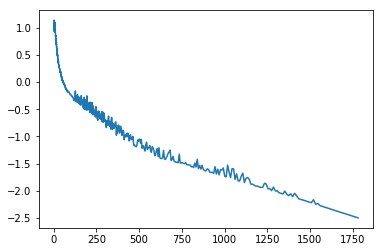

In [42]:
# plot loss by perp
plt.plot(perps, dfm.loss)

[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'7'),
 Text(0,0,'20'),
 Text(0,0,'54'),
 Text(0,0,'148'),
 Text(0,0,'403'),
 Text(0,0,'1096'),
 Text(0,0,'2980')]

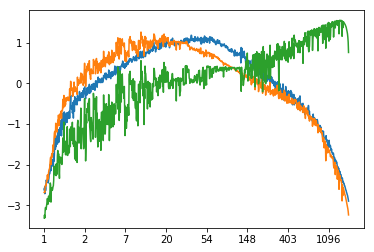

In [43]:
x_axis = np.log(perps)

fig, ax = plt.subplots()
ax.plot(x_axis, dfc.s_all,
        x_axis, dfm.auc_rnx,
        x_axis, dfm.pearsonr)

# custom tick_labels in x-axis
lbls = ax.get_xticks()
x_labels = list(map(int, np.exp(lbls)))
ax.set_xticklabels(x_labels)

[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'7'),
 Text(0,0,'20'),
 Text(0,0,'54'),
 Text(0,0,'148'),
 Text(0,0,'403'),
 Text(0,0,'1096'),
 Text(0,0,'2980')]

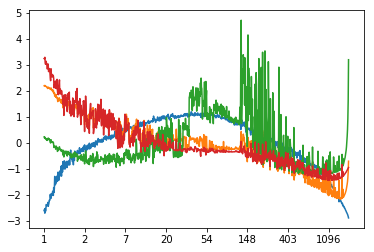

In [50]:
fig, ax = plt.subplots()

plt.plot(x_axis, dfc.s_all,
         x_axis, dfm.mds_isotonic,
         x_axis, dfm.sammon_nlm,
         x_axis, dfm.cca_stress)

# custom tick_labels in x-axis
lbls = ax.get_xticks()
x_labels = list(map(int, np.exp(lbls)))
ax.set_xticklabels(x_labels)

In [64]:
s_all = dfc.s_all.ravel()
auc_rnx = dfm.auc_rnx.ravel()
print(s_all.shape, auc_rnx.shape)
diff = s_all - auc_rnx
diff = np.abs(diff)

(897,) (897,)


In [65]:
print(x_axis.shape, diff.shape)

(897,) (897,)


<Container object of 897 artists>

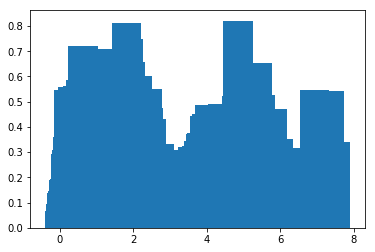

In [66]:
plt.bar(x_axis, diff)